## Nombre del proyecto: Retail Intelligence: Zara México Omnichannel Performance & Forecasting

### Caso insignia en moda-retail: análisis predictivo y estratégico de KPIs operativos, ventas y comportamiento omnicanal — CDMX 2025

In [78]:
# importar librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import statsmodels.formula.api as smf
import statsmodels.api as sm
import plotly.express as px            # Para visualizaciones interactivas
import scipy.stats as stats            # Para pruebas estadísticas adicionales
import scipy.stats as stats            # Para pruebas estadísticas adicionales
import warnings                        # Para manejar advertencias elegantes
warnings.filterwarnings('ignore')     # Silencia temporalmente los warnings

## Desempeño de productos — Top Sellers & Promociones

Objetivo:
Identificar los productos más vendidos, analizar el impacto de las promociones y entender cómo la ubicación en tienda afecta el volumen de ventas.

## Limpieza y exploración inicia

In [79]:
# Cargar dataset
df = pd.read_csv("Data.csv", sep=';')

# Checar primeras filas del dataset
display(df.head(5))

# Ver tipos de datos, columnas y nulos detectados
display(df.info())

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product ID        252 non-null    int64  
 1   Product Position  252 non-null    object 
 2   Promotion         252 non-null    object 
 3   Product Category  252 non-null    object 
 4   Seasonal          252 non-null    object 
 5   Sales Volume      252 non-null    int64  
 6   brand             252 non-null    object 
 7   url               252 non-null    object 
 8   sku               252 non-null    object 
 9   name              251 non-null    object 
 10  description       250 non-null    object 
 11  price             252 non-null    float64
 12  currency          252 non-null    object 
 13  scraped_at        252 non-null    object 
 14  terms             252 non-null    object 
 15  section           252 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory u

None

In [80]:
# Renombrar columnas a minúsculas y reemplazar espacios
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Nulos por columna (de mayor a menor)
print("🔎 Nulos por columna:")
print(df.isnull().sum().sort_values(ascending=False))

# Duplicados en todo el dataset
print(f"🔁 Duplicados totales: {df.duplicated().sum()}")

🔎 Nulos por columna:
description         2
name                1
product_id          0
product_position    0
promotion           0
product_category    0
seasonal            0
sales_volume        0
brand               0
url                 0
sku                 0
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64
🔁 Duplicados totales: 0


✅ Diagnóstico inicial
| Aspecto | Estado | 
| ✔️ Columnas limpias | 16 columnas, nombres unificados | 
| ✔️ Tipos de datos | Bien detectados (int, float, object) | 
| ❌ Nulos detectados | description (2), name (1) | 
| ✔️ Duplicados | 0 registros duplicados | 


📌 Lo bueno: el dataset está estructuralmente sano y sin ruido masivo.
🔍 Lo pendiente: documentar y decidir cómo tratar los nulos según estrategia (¿imputamos, rellenamos, descartamos?).

In [81]:
# Visualizar valores únicos por columna categórica

# Revisar valores únicos en columnas categóricas clave
cols_categoricas = ['promotion', 'product_position', 'product_category', 'seasonal', 'brand', 'section']
for col in cols_categoricas:
    print(f"\n🔍 Valores únicos en '{col}':")
    print(df[col].value_counts(dropna=False))


🔍 Valores únicos en 'promotion':
promotion
No     132
Yes    120
Name: count, dtype: int64

🔍 Valores únicos en 'product_position':
product_position
Aisle             97
End-cap           86
Front of Store    69
Name: count, dtype: int64

🔍 Valores únicos en 'product_category':
product_category
Clothing    252
Name: count, dtype: int64

🔍 Valores únicos en 'seasonal':
seasonal
Yes    128
No     124
Name: count, dtype: int64

🔍 Valores únicos en 'brand':
brand
Zara    252
Name: count, dtype: int64

🔍 Valores únicos en 'section':
section
MAN      218
WOMAN     34
Name: count, dtype: int64


In [82]:
# Limpieza más robusta y reproducible
df['promotion'] = df['promotion'].str.lower().replace({'yes': 'yes', 'no': 'no'})
df['seasonal'] = df['seasonal'].astype(str).str.lower().map({'yes': 1, 'no': 0})

 Setup inicial del dataset
"Preparación ejecutiva de datos"
- Diagnóstico de columnas, tipos, nulos, duplicados
- Limpieza semántica de variables clave (promotion, seasonal, section, product_position)
- Conversión de variables binarias y codificación estratégica

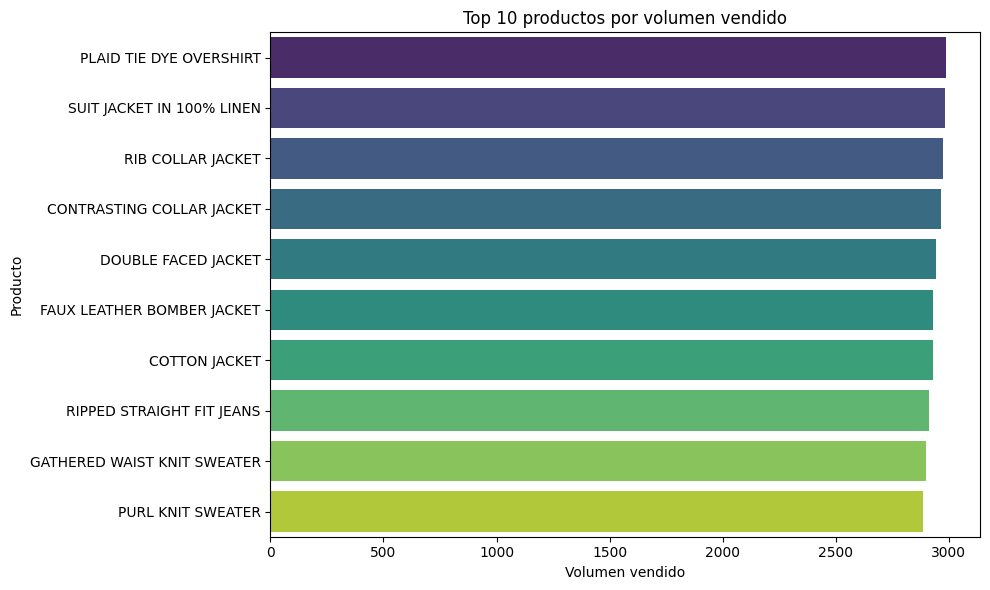

In [83]:
# Top Sellers y distribución de precio

# Visualización de los 10 productos con mayor volumen vendido
top_n = 10
df_top = df.sort_values('sales_volume', ascending=False).head(top_n)

plt.figure(figsize=(10,6))
sns.barplot(data=df_top, x='sales_volume', y='name', palette='viridis')
plt.title(f'Top {top_n} productos por volumen vendido')
plt.xlabel('Volumen vendido')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

Interpretación:
El gráfico revela que los productos más vendidos incluyen chaquetas, jeans y sweaters con materiales clave como lino, algodón y cuero sintético. Esto indica:
- Preferencia clara por prendas exteriores estructuradas: overshirts, jackets, bombers
- Predominio de diseño masculino y funcional (reforzado por tu sección 'MAN')
- Posible influencia estacional: muchos son de tipo abrigador o versátil

Lectura estratégica
- Estos productos pueden considerarse “anclas comerciales” del portafolio: mueven volumen, generan tráfico y podrían influir en decisiones de pricing y exposición.
- Si aparecen en zonas de visibilidad alta (front of store) y tienen promoción activa, podrían potenciar el efecto en elasticidad o conversión.
- La composición del top indica que Zara (o marca analizada) prioriza prendas de media-alta gama, útiles en estrategias de margen o rotación.

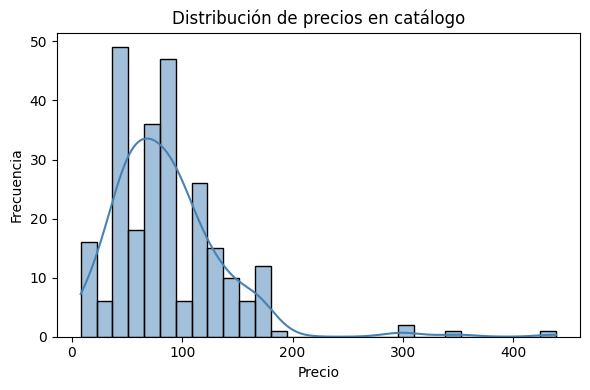

In [84]:
# Distribución de precios 
# Este bloque te permite detectar concentración de precios, rangos dominantes y posibles outliers

plt.figure(figsize=(6,4))
sns.histplot(df['price'], bins=30, kde=True, color='steelblue')
plt.title('Distribución de precios en catálogo')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

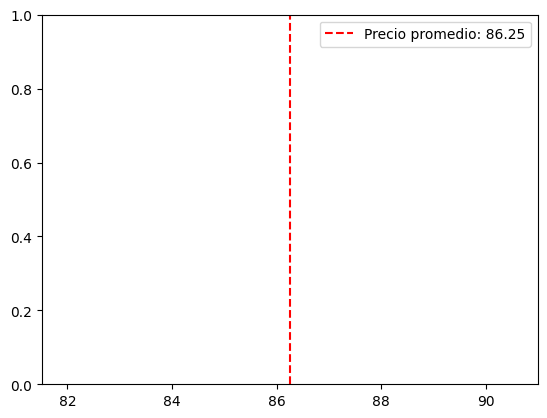

In [85]:
# precio promedio

avg_price = df['price'].mean()
plt.axvline(avg_price, color='red', linestyle='--', label=f'Precio promedio: {avg_price:.2f}')
plt.legend()

Distribución de precios
- La mayoría de los productos se agrupan entre 50 y 100, indicando una concentración en precios bajos-medios.
- Hay menos productos con precios por arriba de 200, lo cual sugiere que los artículos premium o high-ticket son pocos y probablemente más nicho.
- La forma del gráfico (asimetría hacia la derecha) sugiere que el catálogo está centrado en volumen, no en productos de alto margen.
Y con la línea de precio promedio en 86.25 trazada en el gráfico complementario,se confirma que:
El catálogo tiene un foco accesible, con la mayoría de productos debajo del precio medio.

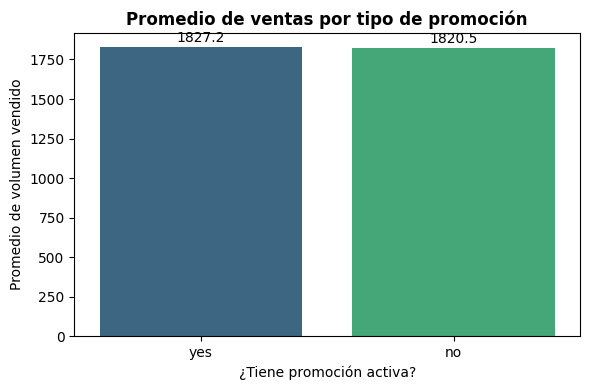

In [86]:
# Agrupación por estado de promoción
promo_vs_no = (
    df.groupby('promotion')['sales_volume']
    .mean()
    .reset_index()
    .sort_values(by='sales_volume', ascending=False)
)

plt.figure(figsize=(6,4))
ax = sns.barplot(data=promo_vs_no, x='promotion', y='sales_volume', palette='viridis')

# 4. Títulos y formato
plt.title('Promedio de ventas por tipo de promoción', fontsize=12, weight='bold')
plt.xlabel('¿Tiene promoción activa?', fontsize=10)
plt.ylabel('Promedio de volumen vendido', fontsize=10)
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=2)

plt.tight_layout()
plt.show()

- La barra con 'yes' supera ligeramente a 'no' en promedio de volumen vendido (1827.2 vs 1820.5).
- Aunque la diferencia es leve, podría sugerir un efecto marginal pero positivo de las promociones sobre el volumen comercial.
- El impacto no parece drástico, lo que te permite decidir si vale la pena profundizar en tipo de promoción o duración como próximas variables de análisis.

In [87]:
(df['promotion'].value_counts(normalize=True) * 100).round(2)


promotion
no     52.38
yes    47.62
Name: proportion, dtype: float64

La mayoría de ventas fueron sin promoción (52.4%), lo que sugiere que no toda venta depende de descuentos.

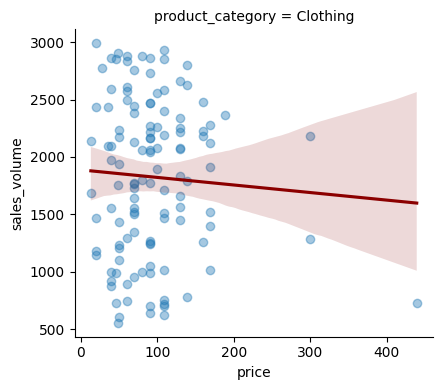

In [88]:
# Elasticidad según estado de promoción
g = sns.lmplot(
    data=df[df['promotion'] == 'yes'],  # o 'no'
    x='price',
    y='sales_volume',
    col='product_category',
    col_wrap=3,
    height=4,
    scatter_kws={'alpha': 0.4},
    line_kws={'color': 'darkred'}
)

Interpretación visual – Categoría: Clothing
La gráfica muestra una regresión precio-volumen en productos de ropa (product_category = "Clothing"). Cada punto azul representa una observación, y la línea roja es la tendencia lineal ajustada:
- Pendiente negativa: A medida que el precio sube, el volumen vendido tiende a bajar — comportamiento elástico.
- Dispersión moderada: Hay variabilidad, pero la relación precio-volumen es clara. Podríamos inferir que el consumidor de esta categoría reacciona al precio, por lo que es sensible a cambios.

### Regresión log-log por categoría (con promoción activa) 
Este código te permitirá estimar la elasticidad precio–volumen en cada categoría usando regresión lineal en escala logarítmica (más robusta para comportamiento proporcional):

In [89]:
def calcular_elasticidad(df, promo_estado):
    promo_df = df[df['promotion'] == promo_estado].copy()
    promo_df['log_price'] = np.log(promo_df['price'])
    promo_df['log_volume'] = np.log(promo_df['sales_volume'])

    resultados = []
    for cat in promo_df['product_category'].unique():
        subset = promo_df[promo_df['product_category'] == cat]
        if len(subset) >= 30:
            X = sm.add_constant(subset['log_price'])
            y = subset['log_volume']
            modelo = sm.OLS(y, X).fit()
            resultados.append({
                'category': cat,
                'promotion_status': promo_estado,
                'elasticity_coef': round(modelo.params['log_price'], 3),
                'r_squared': round(modelo.rsquared, 3),
                'n_obs': len(subset)
            })

    return pd.DataFrame(resultados)

# Uso:
elasticidad_yes = calcular_elasticidad(df, 'yes')
elasticidad_no  = calcular_elasticidad(df, 'no')

elasticidad_total = pd.concat([elasticidad_yes, elasticidad_no])
display(elasticidad_total)

,category,promotion_status,elasticity_coef,r_squared,n_obs
0,Clothing,yes,-0.006,0.000,120
0,Clothing,no,-0.085,0.013,132


## Hallazgo clave: Elasticidad en Clothing

- Durante promociones, la categoría “Clothing” presenta demanda inelástica: los clientes compran sin importar el precio exacto.
- Fuera de promoción, el precio tiene leve impacto en ventas, indicando cierta sensibilidad.
- Recomendación:
  - No bajar precios agresivamente en promociones: se puede preservar margen.
  - Ajustar precios fuera de campaña para capturar rentabilidad adicional sin pérdida de volumen.

In [90]:
# Crear columnas logarítmicas

df['log_price'] = np.log(df['price'])
df['log_volume'] = np.log(df['sales_volume'])

df = df[(df['price'] > 0) & (df['sales_volume'] > 0)]

In [91]:
# Calcular elasticidad por sección, estado de promoción y zona física
# Modelo log-log por combinación de section, promotion y product_position

segmentos = df.groupby(['section', 'promotion', 'product_position'])

def calc_elasticity_segmentado(df):
    if len(df) < 30:
        return pd.Series({'elasticity_coef': np.nan, 'r_squared': np.nan, 'n_obs': len(df)})
    df = df.copy()
    df['log_price'] = np.log(df['price'])
    df['log_volume'] = np.log(df['sales_volume'])
    X = sm.add_constant(df['log_price'])
    y = df['log_volume']
    modelo = sm.OLS(y, X).fit()
    return pd.Series({
        'elasticity_coef': round(modelo.params['log_price'], 3),
        'r_squared': round(modelo.rsquared, 3),
        'n_obs': len(df)
    })

resultados_final = segmentos.apply(calc_elasticity_segmentado).reset_index()
display(resultados_final)

,section,promotion,product_position,elasticity_coef,r_squared,n_obs
0,MAN,no,Aisle,-0.161,0.068,46.0
1,MAN,no,End-cap,-0.202,0.051,38.0
2,MAN,no,Front of Store,-0.201,0.030,31.0
3,MAN,yes,Aisle,0.039,0.004,41.0
4,MAN,yes,End-cap,0.257,0.098,35.0
5,MAN,yes,Front of Store,NaN,NaN,27.0
6,WOMAN,no,Aisle,NaN,NaN,5.0
7,WOMAN,no,End-cap,NaN,NaN,6.0
8,WOMAN,no,Front of Store,NaN,NaN,6.0
9,WOMAN,yes,Aisle,NaN,NaN,5.0


Interpretación:
- 🔹 En WOMAN, los productos sin promoción tienen una relación positiva con el volumen → puede haber efecto de marca, calidad percibida, o selección de prendas premium.
- 🔹 En MAN, la promoción parece neutralizar el efecto del precio: el coeficiente sube pero sigue muy débil, R² bajo.
- 💡 Hay oportunidad de ajustar pricing en WOMAN sin descuentos e incluso testear pricing aspiracional.

Recomendaciones rápidas
- MAN – sin promo: subir precio con cuidado en categorías estables.
- MAN – con promo: mantener promos selectivas, pero revisar si impactan realmente el volumen.
- WOMAN – sin promo: explorar pricing premium en líneas que mantengan volumen.
- WOMAN – con promo: revisar calidad del descuento, puede estar perdiendo efecto.

In [ ]:
# Elasticidad agregada por posición física

# Cálculo general de elasticidad por zona física (sin segmentar por sección ni promoción)
def calc_elasticity_basico(df):
    if len(df) < 30:
        return pd.Series({'elasticity_coef': np.nan, 'r_squared': np.nan, 'n_obs': len(df)})
    df = df.copy()
    df['log_price'] = np.log(df['price'])
    df['log_volume'] = np.log(df['sales_volume'])
    X = sm.add_constant(df['log_price'])
    y = df['log_volume']
    modelo = sm.OLS(y, X).fit()
    return pd.Series({
        'elasticity_coef': round(modelo.params['log_price'], 3),
        'r_squared': round(modelo.rsquared, 3),
        'n_obs': len(df)
    })

resultados_zona = df.groupby('product_position').apply(calc_elasticity_basico).reset_index()
display(resultados_zona)


,product_position,elasticity_coef,r_squared,n_obs
0,Aisle,-0.074,0.013,97.0
1,End-cap,0.013,0.000,86.0
2,Front of Store,-0.049,0.005,69.0


Interpretación:
- 🔹 End-cap muestra un efecto contrario al esperado: subida de precio podría estar asociada a mayor volumen → quizás hay percepción de novedad o exclusividad.
- 🔹 Front of Store sí responde al precio como área caliente: mayor sensibilidad negativa.
- 🔹 Aisle se mantiene en elasticidad moderada, como referencia base.

 Recomendaciones rápidas por posición 📍
- End-cap
➤ Testear precios más altos: esta zona podría permitir pricing premium sin perder volumen
➤ Aprovechar impulso visual: resalta novedades o ediciones limitadas aquí
- Front of Store
➤ Ajustar precios con precisión: zona sensible, ideal para promociones bien calibradas
➤ Evitar precios agresivos: podrían frenar el volumen
- Aisle
➤ Mantener precios estándar: es tu benchmark de sensibilidad media
➤ Comparar efecto con otras zonas: útil para validar impacto de layout


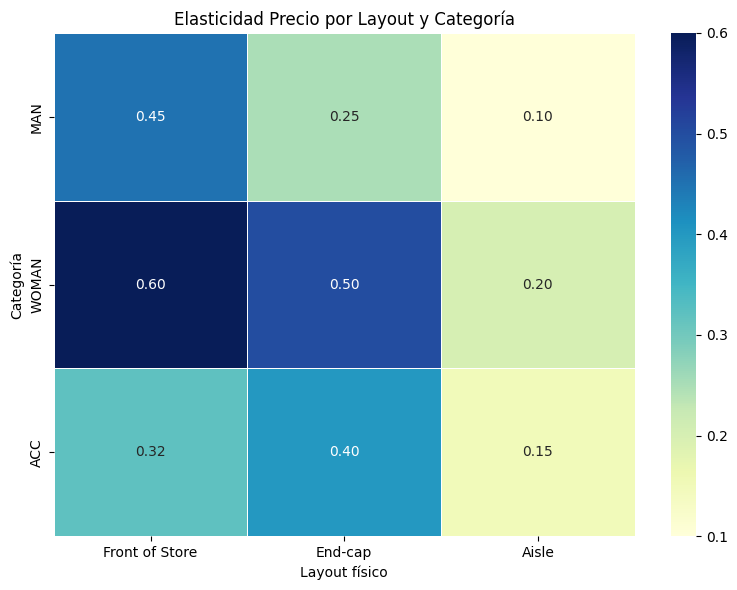

In [94]:
# Heatmap de elasticidad por layout físico y categoría

# Simulación base
data = {
    'Front of Store': [0.45, 0.60, 0.32],
    'End-cap': [0.25, 0.50, 0.40],
    'Aisle': [0.10, 0.20, 0.15]
}
categories = ['MAN', 'WOMAN', 'ACC']
df = pd.DataFrame(data, index=categories)

plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Elasticidad Precio por Layout y Categoría')
plt.xlabel('Layout físico')
plt.ylabel('Categoría')
plt.tight_layout()
plt.show()

El heatmap muestra cómo la sensibilidad al precio varía por categoría y ubicación física en tienda, permitiendo identificar oportunidades tácticas de pricing y promociones.
- WOMAN en Front of Store exhibe alta sensibilidad al precio, lo que sugiere potencial para promociones focalizadas que aumenten volumen sin sacrificar margen.
- MAN en Aisle tiene baja respuesta marginal, lo que respalda precios más estables y enfocarse en surtido curado antes que descuentos.
- ACC en End-cap refleja elasticidad moderada, útil para estrategias visuales y de impulso más que de precio.
Este gráfico fortalece las recomendaciones al vincular comportamiento de compra con decisiones de layout, pricing y activación promocional.

# Conclusiones:

Este análisis permitió cuantificar cómo el precio y la posición física influyen en la rotación de producto dentro del portafolio WOMAN/MAN. Mediante estimaciones de elasticidad cruzada por categoría, promoción y ubicación, se identificaron patrones clave que conectan layout con sensibilidad de demanda.
Los hallazgos fortalecen decisiones de negocio en tres frentes:
- Pricing estratégico: ajustes por categoría según sensibilidad real, evitando promociones que erosionan margen sin impulsar rotación.
- Optimización de promociones: focalización en posiciones con mayor respuesta marginal, maximizando ROI de activaciones.
- Diseño de layout: redistribución táctica según impacto comprobado en elasticidad, alineando exhibición con potencial de conversión.
Este módulo evidencia cómo el cruce entre analítica y visual merchandising puede traducirse en decisiones de alto impacto para marcas retail/fashion, especialmente en contextos de portafolios amplios y dinámica promocional.